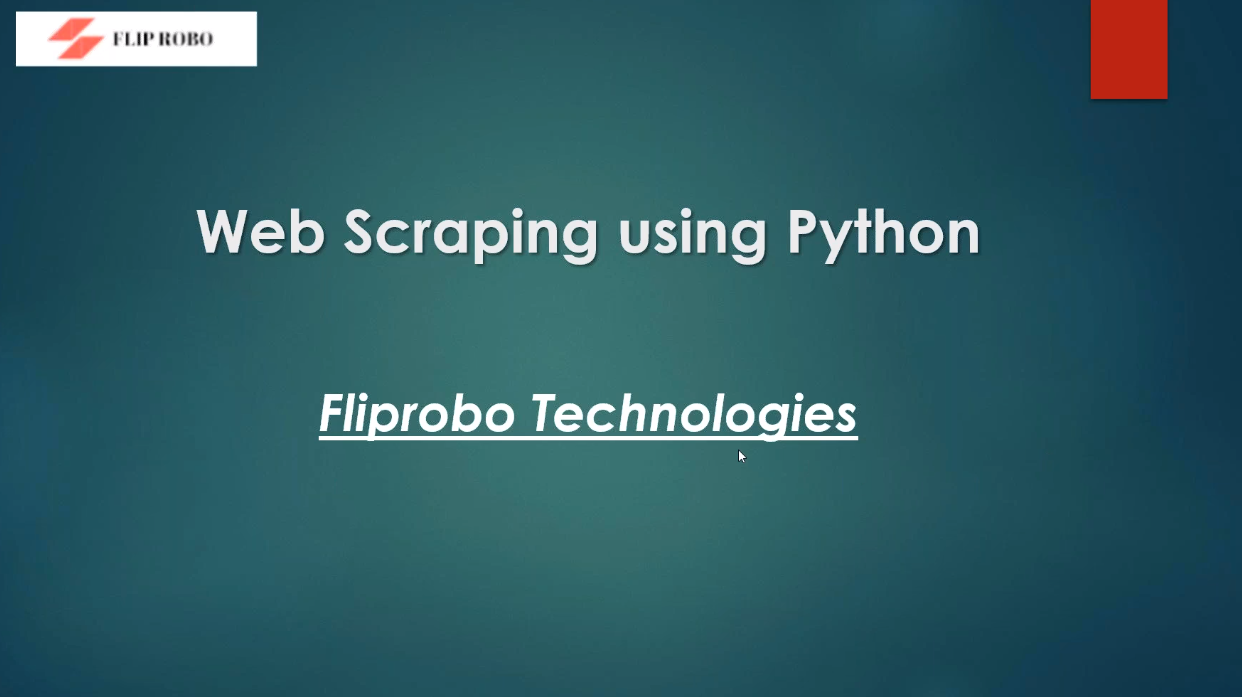

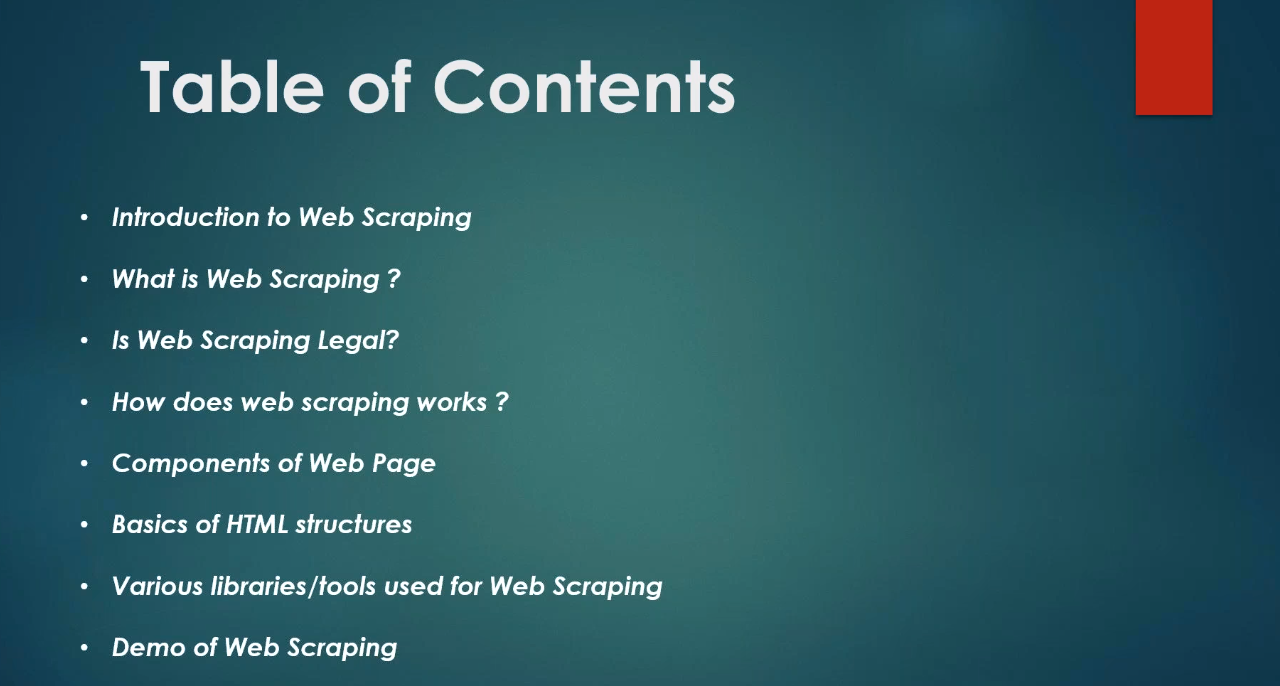

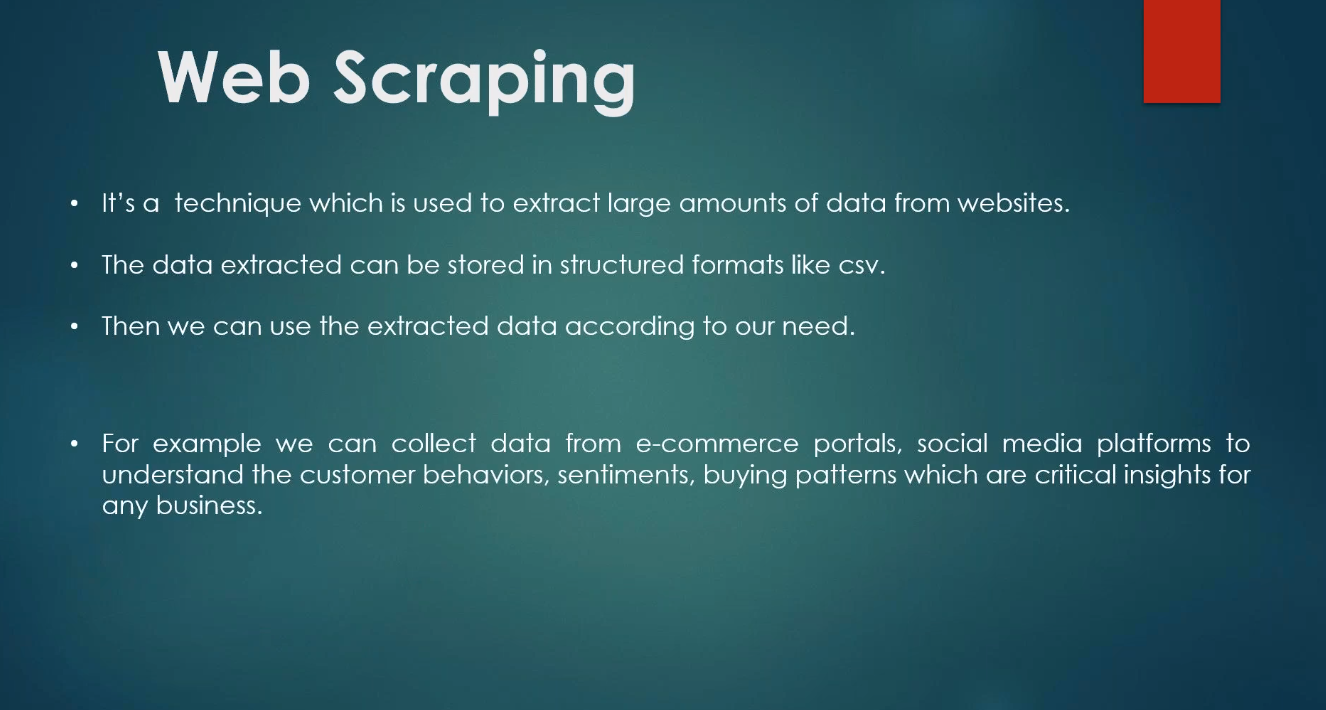

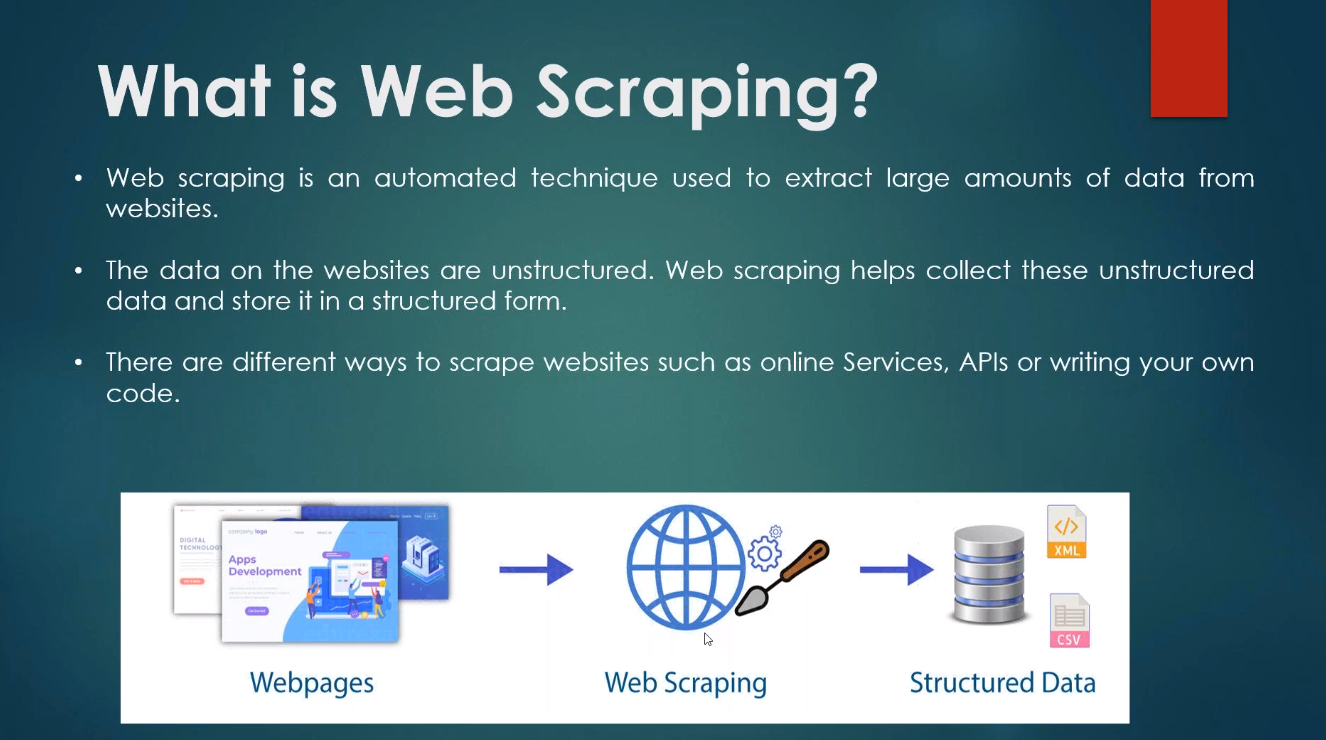

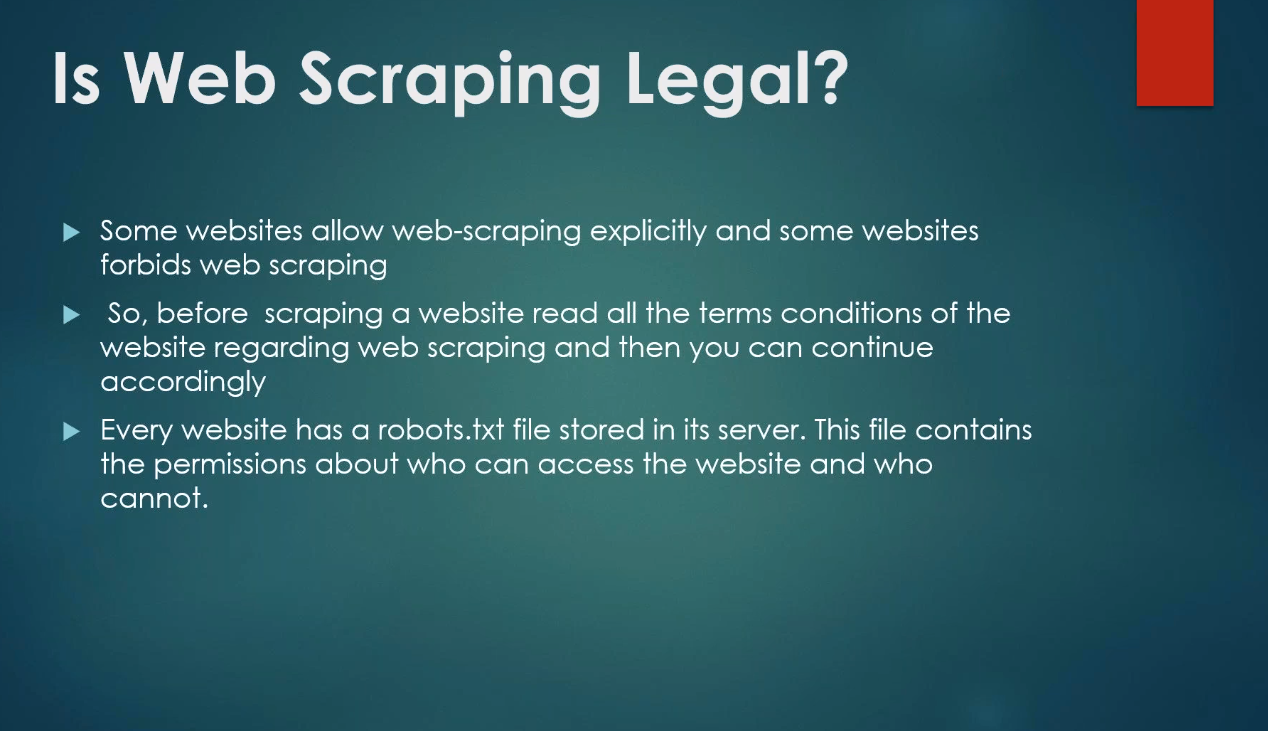

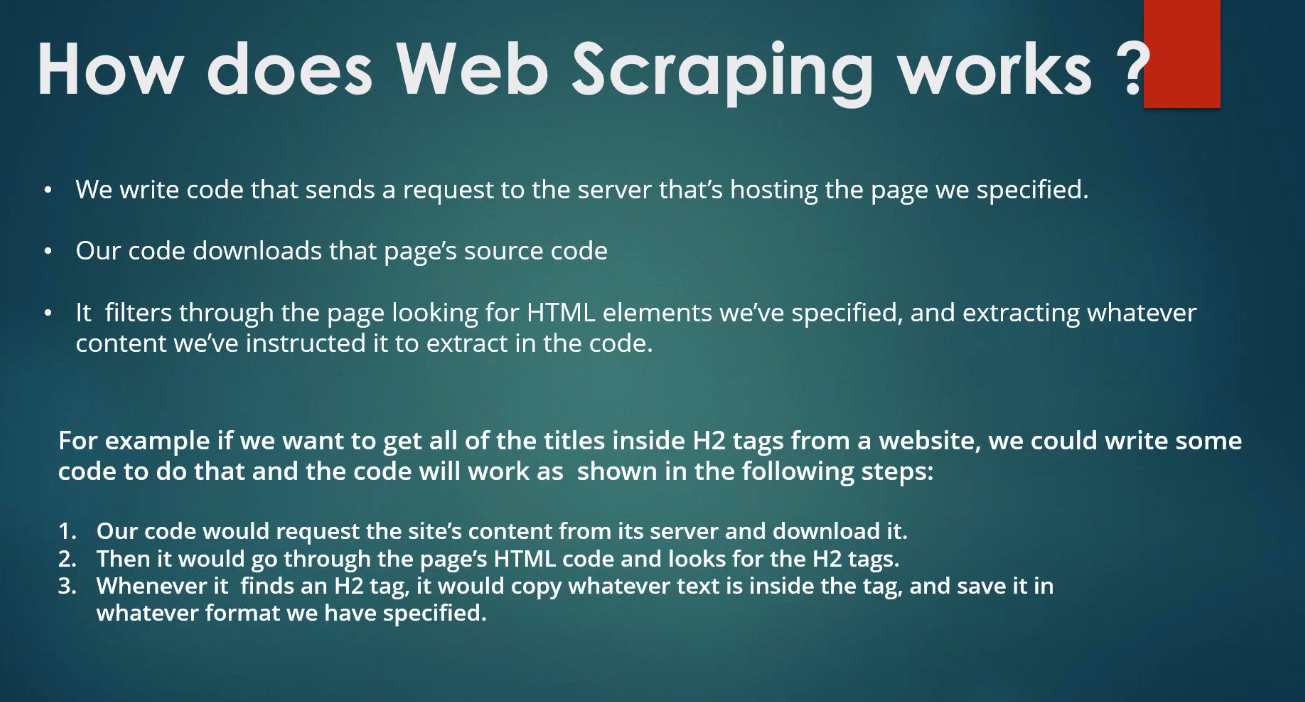

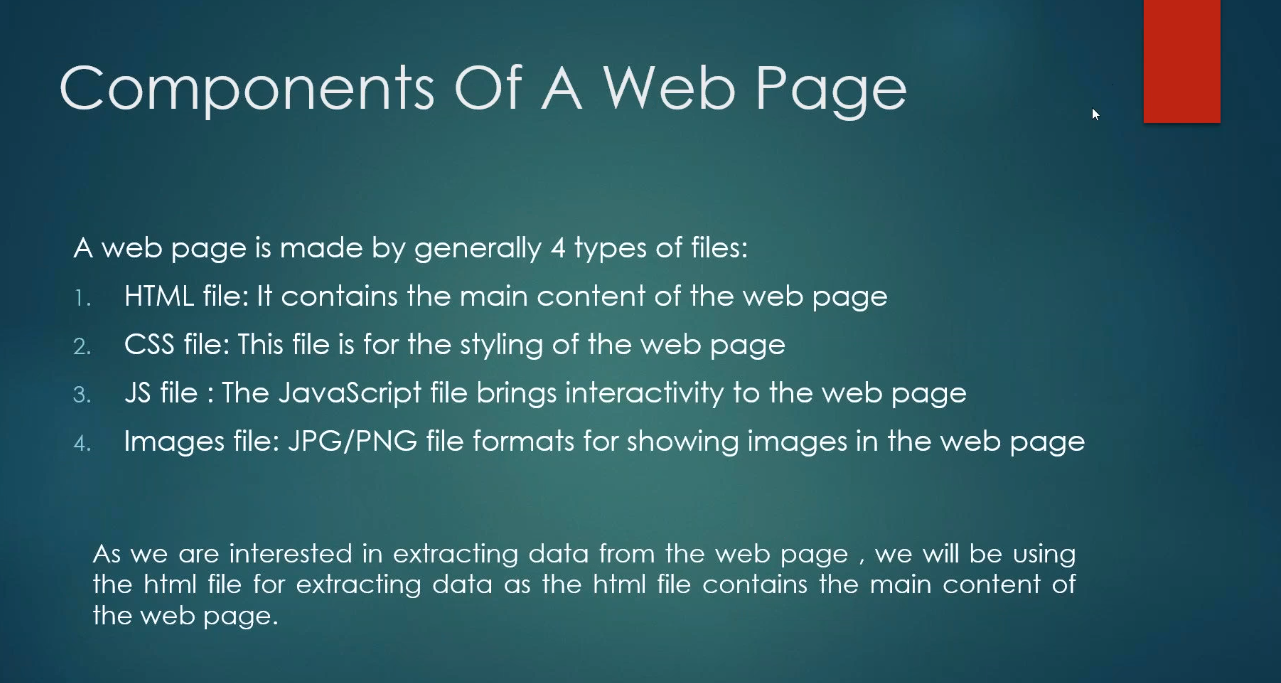

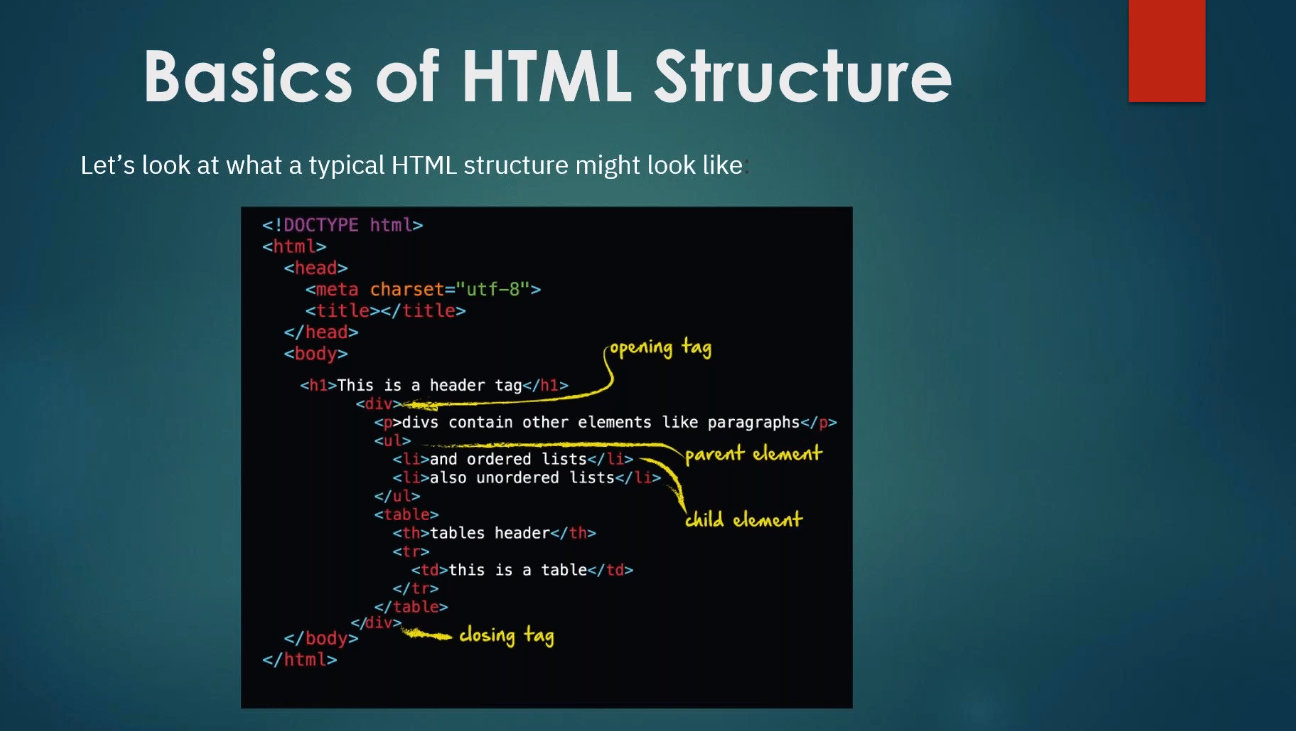

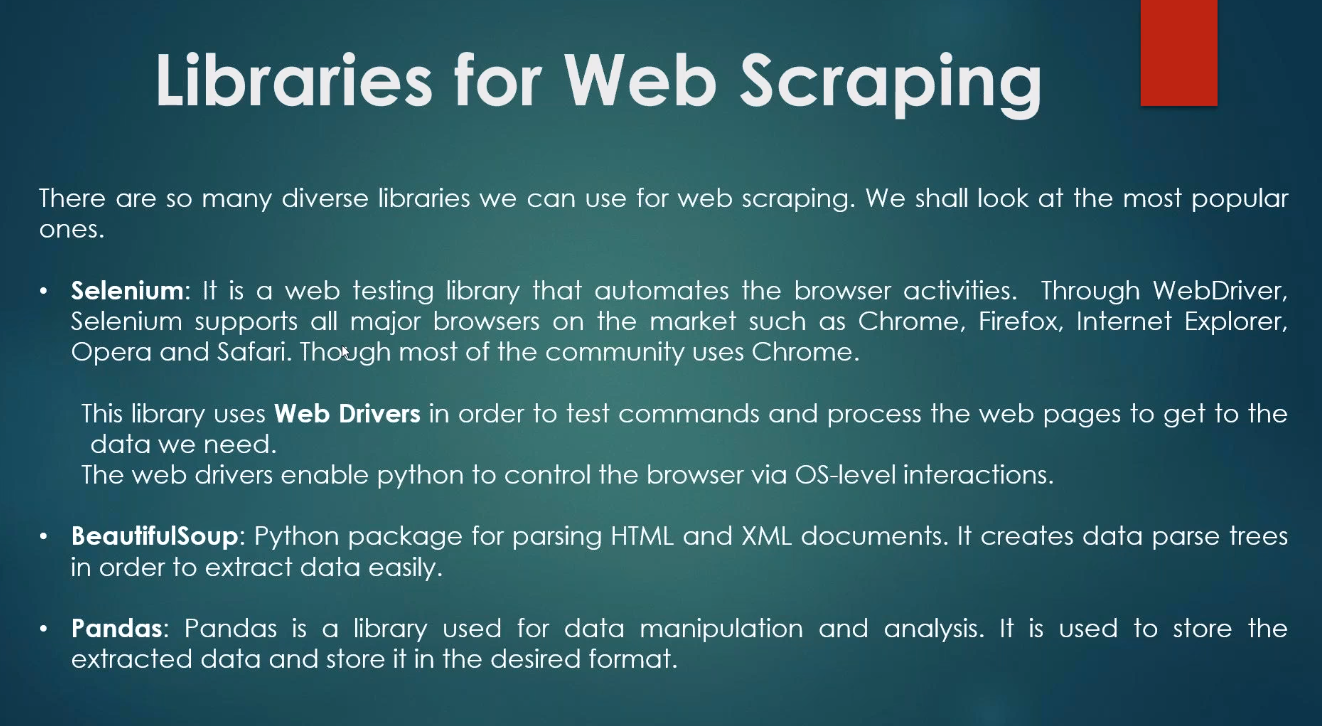

### First install libraries

First we will import all the required libraries required for web_scraping.

We will require two libraries for web_scraping:

- **requests**:- This will be used to send get requests to the web page server to get the source-code of the webpage.
    
- **BeautifulSoup**:- It will be used to parse the source code and to extractthe required data from the parsed structure.


In [2]:
!pip install bs4
!pip install requests

### Import Required Libraries

In [3]:
from bs4 import BeautifulSoup
import requests

## Send get request to the webpage server to get the source code of the page

In [4]:
page = requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special')

In [5]:
page

<Response [200]>

## Page content

In [7]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

## Scraping First name

- First, we will use html tag where we have the first title of the restaurants.

In [8]:
First_tittle = soup.find('a',class_="restnt-name ellipsis")
First_tittle

<a analytics-action="RestaurantCardClick" analytics-label="86792_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-connaught-place-central-delhi-86792">Castle Barbeque</a>

In [9]:
First_tittle.text

'Castle Barbeque'

## Scraping First Location

In [10]:
loc = soup.find('div',class_="restnt-loc ellipsis")
loc.text

'Connaught Place, Central Delhi'

### Scraping First  Price

In [11]:
price = soup.find('span',class_="double-line-ellipsis")
price.text

'₹ 2,000 for 2 (approx) | Chinese, North Indian'

In [12]:
price.text.split()

['₹', '2,000', 'for', '2', '(approx)', '|', 'Chinese,', 'North', 'Indian']

In [14]:
price.text.split('|')

['₹ 2,000 for 2 (approx) ', ' Chinese, North Indian']

In [13]:
# finally get the price
price.text.split('|')[0]

'₹ 2,000 for 2 (approx) '

## Scraping Multiple Titles

In [15]:
# Now we have all the tags in which there are the job titles.

# Now we will extract the text from these tags one by one by Looping over these tags.

titles = []     # empty list for store the 


for i in soup.find_all('a',class_="restnt-name ellipsis"):
    titles.append(i.text)

In [16]:
titles

['Castle Barbeque',
 'Jungle Jamboree',
 'Cafe Knosh',
 "Castle's Barbeque",
 'The Barbeque Company',
 'India Grill',
 'Delhi Barbeque',
 'The Monarch - Bar Be Que Village',
 'Indian Grill Room']

In [17]:
titles[1:2]

['Jungle Jamboree']

### Scraping Multiple Location

In [21]:
loc=[]
for i in soup.find_all('div',class_="restnt-loc ellipsis"):
    loc.append(i.text)
    
loc

['Connaught Place, Central Delhi',
 '3CS Mall,Lajpat Nagar - 3, South Delhi',
 'The Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'Pacific Mall,Tagore Garden, West Delhi',
 'Gardens Galleria,Sector 38A, Noida',
 'Hilton Garden Inn,Saket, South Delhi',
 'Taurus Sarovar Portico,Mahipalpur, South Delhi',
 'Indirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'Suncity Business Tower,Golf Course Road, Gurgaon']

## Scraping Multiple Price

In [26]:
price=[]
for i in soup.find_all('span',class_="double-line-ellipsis"):
    price.append(i.text.split('|')[0])
    
price

['₹ 2,000 for 2 (approx) ',
 '₹ 1,680 for 2 (approx) ',
 '₹ 3,000 for 2 (approx) ',
 '₹ 2,000 for 2 (approx) ',
 '₹ 1,700 for 2 (approx) ',
 '₹ 2,400 for 2 (approx) ',
 '₹ 1,800 for 2 (approx) ',
 '₹ 1,900 for 2 (approx) ',
 '₹ 2,200 for 2 (approx) ']

In [28]:
images=[]
for i in soup.find_all('img',class_="no-img"):
    images.append(i.get('data-src'))
    
images

['https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/p/m/p59633-166088382462ff137009010.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/4/p/m/p406-15438184745c04ccea491bc.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/7/p/k/p79307-16051787755fad1597f2bf9.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/2/v/t/p2687-1482477169585cce712b90f.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/d/i/p52501-1661855212630de5eceb6d2.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/n/o/p34822-15599107305cfa594a13c24.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/

In [29]:
# making dataframe



import pandas as pd


data=pd.DataFrame() 
data["Restaurant name"] = titles
data['Location'] = loc
data['Price'] = price
data['view'] =images
data

Restaurant name  \
0                   Castle Barbeque   
1                   Jungle Jamboree   
2                        Cafe Knosh   
3                 Castle's Barbeque   
4              The Barbeque Company   
5                       India Grill   
6                    Delhi Barbeque   
7  The Monarch - Bar Be Que Village   
8                 Indian Grill Room   

                                            Location                    Price  \
0                     Connaught Place, Central Delhi  ₹ 2,000 for 2 (approx)    
1             3CS Mall,Lajpat Nagar - 3, South Delhi  ₹ 1,680 for 2 (approx)    
2  The Leela Ambience Convention Hotel,Shahdara, ...  ₹ 3,000 for 2 (approx)    
3             Pacific Mall,Tagore Garden, West Delhi  ₹ 2,000 for 2 (approx)    
4                 Gardens Galleria,Sector 38A, Noida  ₹ 1,700 for 2 (approx)    
5               Hilton Garden Inn,Saket, South Delhi  ₹ 2,400 for 2 (approx)    
6     Taurus Sarovar Portico,Mahipalpur, South Delhi  ₹ 1,800 for 2 (approx)    
7  Indirapuram Habitat Centre,Indirapuram, Ghaziabad  ₹ 1,900 for 2 (approx)    
8   Suncity Business Tower,Golf Course Road, Gurgaon  ₹ 2,200 for 2 (approx)    

                                                view  
0  https://im1.dineout.co.in/images/uploads/resta...  
1  https://im1.dineout.co.in/images/uploads/resta...  
2  https://im1.dineout.co.in/images/uploads/resta...  
3  https://im1.dineout.co.in/images/uploads/resta...  
4  https://im1.dineout.co.in/images/uploads/resta...  
5  https://im1.dineout.co.in/images/uploads/resta...  
6  https://im1.dineout.co.in/images/uploads/resta...  
7  https://im1.dineout.co.in/images/uploads/resta...  
8  https://im1.dineout.co.in/images/uploads/resta...